In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from GravNN.Networks.Networks import ResNet, TraditionalNet

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#file_name = 'C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\new_temp.data'
file_name = 'C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\hyperparameter_earth_v5.data'

df = pd.read_pickle(file_name)

In [ ]:
import copy
backup = copy.deepcopy(df)

In [4]:
loss_list = []
val_loss_list = []

for history in df['history']:
    loss_list.append(history['loss'][-1])
    val_loss_list.append(history['val_loss'][-1])
df['loss'] = loss_list
df['val_loss'] = val_loss_list

networks = (df['network_type'] == ResNet)
networks.replace(True, 'resnet',inplace=True)
networks.replace(False, 'traditional',inplace=True)
df['network_type'] = networks

df['model_param_est'] = df['Brillouin_param_rse_mean']*(df['Brillouin_param_rse_mean']+1)

<AxesSubplot:xlabel='model_param_est', ylabel='decay_rate_epoch'>

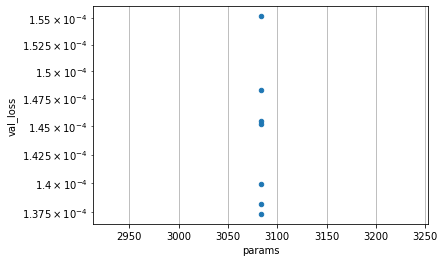

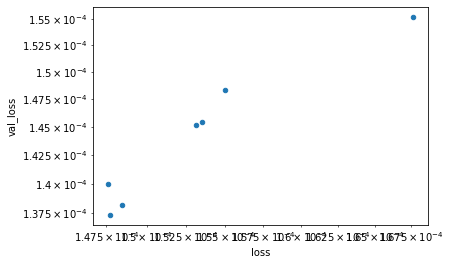

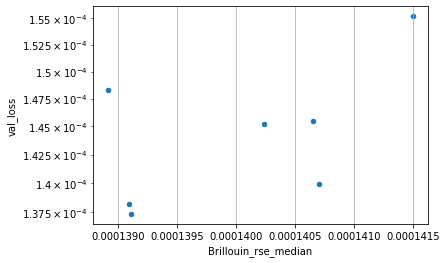

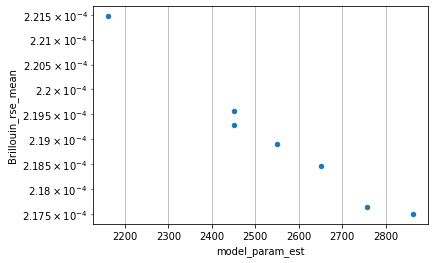

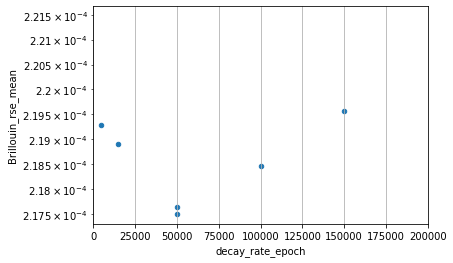

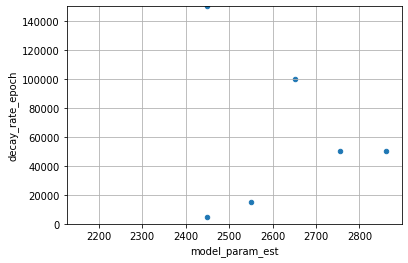

In [5]:
sub_df = df[['params', 'batch_size', 'N_train', 'activation', 'initializer', 'learning_rate', 'network_type', 'loss', 'val_loss']].sort_values(by='val_loss', ascending=False)#, 'Brillouin_sh_diff_median']
#sub_df = df[['params', 'batch_size', 'N_train', 'activation', 'learning_rate', 'Brillouin_param_rse_median', 'Brillouin_param_sigma_2_median']].sort_values(by='Brillouin_param_rse_median', ascending=False)#, 'Brillouin_sh_diff_median']

min_y = None
max_y = None#0.00650509
max_y = None #0.005
df.plot.scatter('params', 'val_loss', ylim=[min_y, max_y],logy=True, grid=True)
df.plot.scatter('loss', 'val_loss',  ylim=[min_y,max_y],logy=True, logx=True, grid=True)
df.plot.scatter('Brillouin_rse_median', 'val_loss', ylim=[min_y, max_y],logy=True, grid=True)

# df.plot.scatter('model_param_est', 'val_loss', ylim=[min_y, max_y],logy=True, grid=True)
# df.plot.scatter('batch_size', 'val_loss',  ylim=[min_y,max_y], logx=True, logy=True, grid=True)
# df.plot.scatter('activation', 'val_loss',  ylim=[min_y, max_y], logy=True, grid=True)
# df.plot.scatter('initializer', 'val_loss', ylim=[min_y, max_y], logy=True, grid=True)
# df.plot.scatter('N_train', 'val_loss', ylim=[min_y, max_y], logx=True, logy=True, grid=True)
# df.plot.scatter('learning_rate', 'val_loss', ylim=[min_y, max_y], logx=True, logy=True, grid=True)

df.plot.scatter('model_param_est', 'Brillouin_rse_mean', ylim=[min_y, max_y],logy=True, grid=True)
# df.plot.scatter('batch_size', 'Brillouin_rse_mean',  ylim=[min_y,max_y], logx=True, logy=True, grid=True)
# df.plot.scatter('activation', 'Brillouin_rse_mean',  ylim=[min_y, max_y], logy=True, grid=True)
# df.plot.scatter('initializer', 'Brillouin_rse_mean', ylim=[min_y, max_y], logy=True, grid=True)
# df.plot.scatter('N_train', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=True, logy=True, grid=True)
#df.plot.scatter('learning_rate', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=True, logy=True, grid=True)
# df.plot.scatter('network_type', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=False, logy=True, grid=True)
#df.plot.scatter('epochs', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=False, logy=True, grid=True)
df.plot.scatter('decay_rate_epoch', 'Brillouin_rse_mean', ylim=[min_y, max_y], xlim=[0, 200000], logx=False, logy=True, grid=True)
df.plot.scatter('model_param_est', 'decay_rate_epoch', ylim=[0, 150000], xlim=[None, None], logx=False, logy=False, grid=True)


#df.plot.scatter('N_train', 'Brillouin_param_rse_mean', ylim=[min_y, max_y], logx=True, logy=False, grid=True)
#df.plot.scatter('network_shape', 'Brillouin_rse_median', ylim=[min_y, max_y],  logy=True, grid=True)

#df.plot.scatter('network_type', 'val_loss', ylim=[0.004508, max_y],  logy=True, grid=True)

#df.plot.scatter('network_type', 'val_loss', ylim=[0.004508, max_y], logy=True, grid=True)


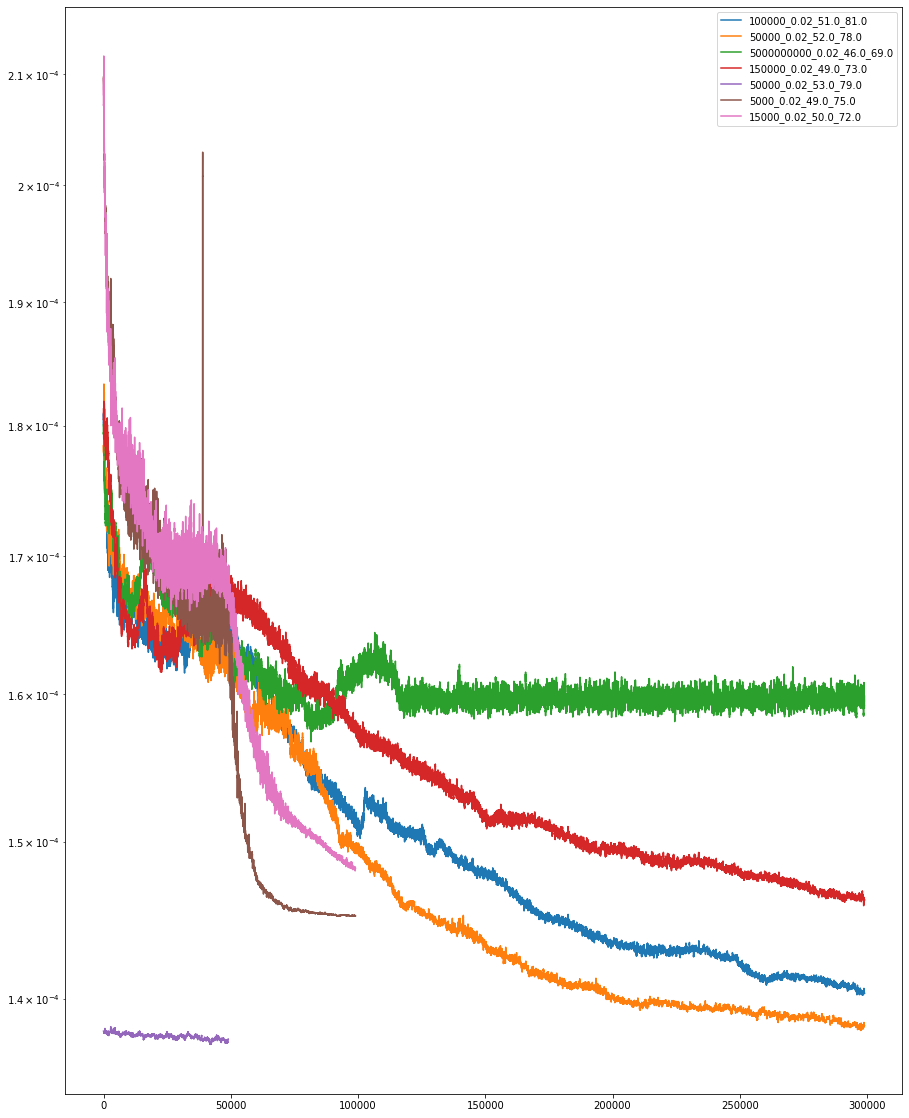

In [6]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.figure(figsize=(15,20))
for i in range(0,len(df)):
    row = df.iloc[i]
    y = row['history']['val_loss']
    x = np.linspace(0,50000,len(y))

    N = 1000
    y_hat = y[N:]
    x_hat = x[N:]
#     poly = np.polyfit(x_hat, y_hat,10)
#     poly_y = np.poly1d(poly)(x_hat)
    poly_y = uniform_filter1d(y_hat, 100)

    alpha = 1
    alpha = 1.0 if row['learning_rate'] == 0.001 else 0.1 # 0.01, 0.005
#     alpha = 1.0 if row['decay_rate'] == 2 else 0.1 # 0.01, 0.005
#     alpha = 1
#     alpha = 1.0 if row['batch_size'] == 32768*4 else 0.1 #  32768
#     alpha = 1.0 if row['decay_rate_epoch'] == 50000 else 0.1 #  32768
    #alpha = 1.0 if row['decay_epoch_0'] == 100000 else 0.1
    #alpha = 1.0 if row['activation'] == 'gelu' else 0.1 # tanh, relu, gelu, swish
    #alpha = 1.0 if row['initializer'] == 'glorot_uniform' else 0.1 # tanh, relu, gelu, swish

    #alpha = 1
    #alpha = 1.0 if row['network_type'] == 'traditional' and row['batch_size'] == 32768 else 0.1
    #alpha = 1.0 if row['activation'] == 'swish' and row['learning_rate'] == 0.005 else 0.1
    #alpha = 1.0 if row['activation'] == 'swish' and row['batch_size'] == 32768 else 0.1
    #alpha = 1.0 if row['activation'] == 'tanh' else 0.1

    alpha = 1.0 if row['epochs'] > 100000 else 0.0# and row['batch_size'] == 32768 else 0.1
    alpha = 1.0 if row['learning_rate'] == 0.02 else 0.1# and row['batch_size'] == 32768 else 0.1

    alpha = 1

    plt.semilogy(poly_y,alpha=alpha, label=str(row['decay_rate_epoch']) + "_" + str(row['learning_rate'])+ "_" + str(row['Brillouin_param_rse_mean']) + "_" + str(row['Brillouin_param_sigma_2_mean']))

plt.legend()


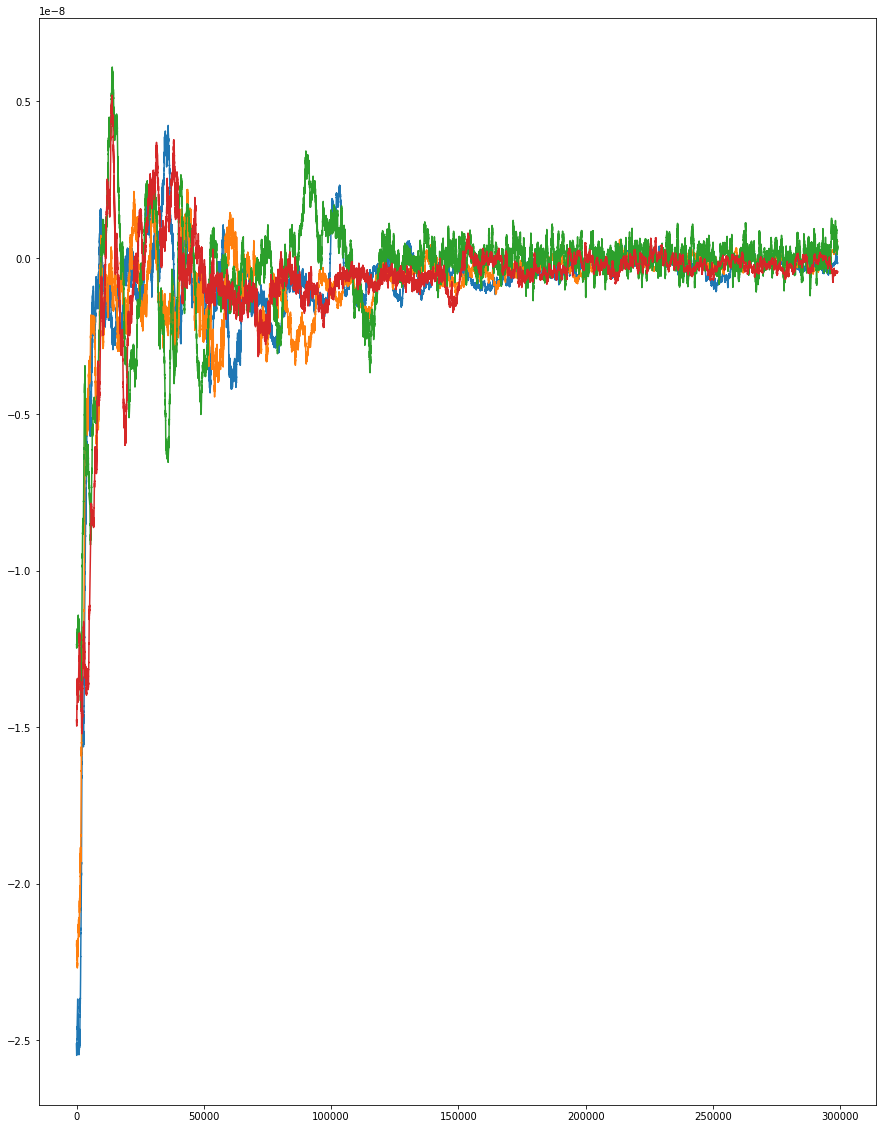

In [8]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.figure(figsize=(15,20))
for i in range(0,len(df)):
    row = df.iloc[i]
    y = row['history']['val_loss']
    x = np.linspace(0,50000,len(y))
    
    N = 1000
    y_hat = y[N:]
    x_hat = x[N:]
#     poly = np.polyfit(x_hat, y_hat,10)
#     poly_y = np.poly1d(poly)(x_hat)
    poly_y = uniform_filter1d(y_hat, 500)
    alpha = 1.0 if row['learning_rate'] == 0.00005 else 0.1 # 0.00005, 0.0005, 0.005
    #alpha = 1.0 if row['batch_size'] == 2048 else 0.1
    alpha = 1
    grad = np.gradient(poly_y, x_hat)
    grad_poly_y = uniform_filter1d(grad, 5000)

    plt.plot(grad_poly_y,alpha=alpha)
    


In [7]:
df = df.sort_values(by='epochs')
#df.drop(index=df.iloc[0:8].index,inplace=True)
df['batch_size']

timetag
Thu Mar 25 20:58:05 2021    65536
Thu Mar 25 21:29:43 2021    32768
Thu Mar 25 21:47:21 2021    65536
Name: batch_size, dtype: int64

In [229]:
df = copy.deepcopy(backup)

In [27]:
df['learning_rate'].max()

0.01

In [259]:
df['val_loss'].min()

0.004507964942604303

In [2]:
backup[['Brillouin_param_rse_mean', 'delta', 'Brillouin_param_sigma_2_mean', 'decay_rate_epoch', 'batch_size', 'learning_rate', 'decay_rate', 'activation']]

NameError: name 'backup' is not defined

In [30]:
backup['id'].values

array([2459314.23119213, 2459314.28079861, 2459314.28988426,
       2459314.29662037])

In [21]:
backup[['time_delta']].values/ backup[['epochs']].values*10

array([[7.51220733],
       [7.65505467],
       [7.68123933],
       [7.70063767],
       [2.814686  ]])

In [26]:
backup['history'][0]['time_delta']#.keys()

225366.22

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


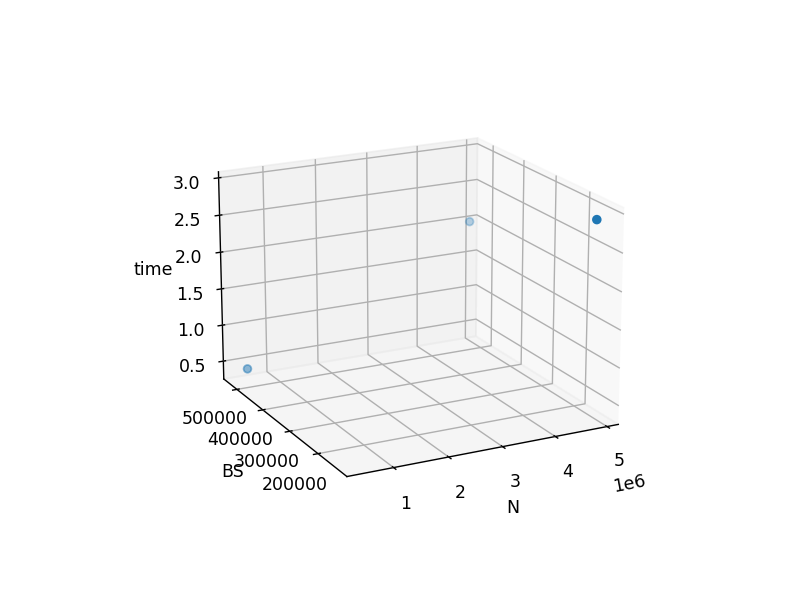

Text(0.5, 0, 'time')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([[490000, 524000, 0.43], [4900000, 524000, 2.0], [4900000, 131000, 2.9]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel('N')
ax.set_ylabel("BS")
ax.set_zlabel("time")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = np.array([[490000, 524000, 0.43], [4900000, 524000, 2.0], [4900000, 131000, 2.9]])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2])
ax.set_xlabel('N')
ax.set_ylabel("BS")
ax.set_zlabel("time")

z = backup[['delta']]
x = backup[['N_train']]
y = backup[['batch_size']]

X, Y = np.meshgrid(x,y)
Z = z.reshape(X.shape)

ax.plot_surface(X,Y,Z)